In [49]:
# import libraries

import pandas as pd
!pip install seaborn 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# read in data

df = pd.read_csv(r"/Users/derp/Downloads/movies.csv",encoding='latin1')
print(df.head())

You should consider upgrading via the '/Users/derp/jupyter/bin/python -m pip install --upgrade pip' command.
       budget                                 company country        director  \
0   8000000.0           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000.0                      Paramount Pictures     USA     John Hughes   
2  15000000.0                      Paramount Pictures     USA      Tony Scott   
3  18500000.0  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000.0                    Walt Disney Pictures     USA  Randal Kleiser   

       genre        gross                      name rating    released  \
0  Adventure   52287414.0               Stand by Me      R  1986-08-22   
1     Comedy   70136369.0  Ferris Bueller's Day Off  PG-13  1986-06-11   
2     Action  179800601.0                   Top Gun     PG  1986-05-16   
3     Action   85160248.0                    Aliens      R  1986-07-18   
4  Adventure   18564613.0   Flight

In [6]:
df.head()

budget                                 company country        director  \
0   8000000.0           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000.0                      Paramount Pictures     USA     John Hughes   
2  15000000.0                      Paramount Pictures     USA      Tony Scott   
3  18500000.0  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000.0                    Walt Disney Pictures     USA  Randal Kleiser   

       genre        gross                      name rating    released  \
0  Adventure   52287414.0               Stand by Me      R  1986-08-22   
1     Comedy   70136369.0  Ferris Bueller's Day Off  PG-13  1986-06-11   
2     Action  179800601.0                   Top Gun     PG  1986-05-16   
3     Action   85160248.0                    Aliens      R  1986-07-18   
4  Adventure   18564613.0   Flight of the Navigator     PG  1986-08-01   

   runtime  score               star   votes         writer  year  
0       89    8.1        Wil Wheaton  299174   Stephen King  1986  
1      103    7.8  Matthew Broderick  264740    John Hughes  1986  
2      110    6.9         Tom Cruise  236909       Jim Cash  1986  
3      137    8.4   Sigourney Weaver  540152  James Cameron  1986  
4       90    6.9        Joey Cramer   36636  Mark H. Baker  1986

In [32]:
# loop through each column to search for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [10]:
# Data types for columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [33]:
# change data type of columns

df['budget'] = df['budget'].astype('int64') 

df['gross'] = df['gross'].astype('int64') 



In [57]:
df.head()

budget                                 company country  \
6380  245000000.0                               Lucasfilm     USA   
5061  237000000.0  Twentieth Century Fox Film Corporation      UK   
2420  200000000.0  Twentieth Century Fox Film Corporation     USA   
6391  150000000.0                      Universal Pictures     USA   
5723  220000000.0                          Marvel Studios     USA   

             director   genre        gross                          name  \
6380      J.J. Abrams  Action  936662225.0  Star Wars: The Force Awakens   
5061    James Cameron  Action  760507625.0                        Avatar   
2420    James Cameron   Drama  658672302.0                       Titanic   
6391  Colin Trevorrow  Action  652270625.0                Jurassic World   
5723      Joss Whedon  Action  623357910.0                  The Avengers   

     rating    released  runtime  score               star    votes  \
6380  PG-13  2015-12-18      136    8.1       Daisy Ridley   687192   
5061  PG-13  2009-12-18      162    7.8    Sam Worthington   954412   
2420  PG-13  1997-12-19      194    7.8  Leonardo DiCaprio   862554   
6391  PG-13  2015-06-12      124    7.0        Chris Pratt   469200   
5723  PG-13  2012-05-04      143    8.1  Robert Downey Jr.  1064633   

               writer  year  
6380  Lawrence Kasdan  2015  
5061    James Cameron  2009  
2420    James Cameron  1997  
6391       Rick Jaffa  2015  
5723      Joss Whedon  2012

In [58]:
# create correct year column

df['yearcorrect'] = df['released'].astype(str).str[0:4]

df.head()

budget                                 company country  \
6380  245000000.0                               Lucasfilm     USA   
5061  237000000.0  Twentieth Century Fox Film Corporation      UK   
2420  200000000.0  Twentieth Century Fox Film Corporation     USA   
6391  150000000.0                      Universal Pictures     USA   
5723  220000000.0                          Marvel Studios     USA   

             director   genre        gross                          name  \
6380      J.J. Abrams  Action  936662225.0  Star Wars: The Force Awakens   
5061    James Cameron  Action  760507625.0                        Avatar   
2420    James Cameron   Drama  658672302.0                       Titanic   
6391  Colin Trevorrow  Action  652270625.0                Jurassic World   
5723      Joss Whedon  Action  623357910.0                  The Avengers   

     rating    released  runtime  score               star    votes  \
6380  PG-13  2015-12-18      136    8.1       Daisy Ridley   687192   
5061  PG-13  2009-12-18      162    7.8    Sam Worthington   954412   
2420  PG-13  1997-12-19      194    7.8  Leonardo DiCaprio   862554   
6391  PG-13  2015-06-12      124    7.0        Chris Pratt   469200   
5723  PG-13  2012-05-04      143    8.1  Robert Downey Jr.  1064633   

               writer  year yearcorrect  
6380  Lawrence Kasdan  2015        2015  
5061    James Cameron  2009        2009  
2420    James Cameron  1997        1997  
6391       Rick Jaffa  2015        2015  
5723      Joss Whedon  2012        2012

In [50]:
# order by gross revenue

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [35]:
# show all data

pd.set_option('display.max_rows', None)

In [36]:
#drop duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

5288                                          micro_scope
3486                                             i5 Films
6084                                                 erbp
3225                                       double A Films
2707                          Zucker Brothers Productions
1495                                   Zeta Entertainment
5905                                 Zentropa Productions
5917                        Zentropa International Norway
3126                              Zentropa Entertainments
329                                  Zenith Entertainment
4710                                      Zazen Produções
542                              Zanuck/Brown Productions
698                                   Zanuck Company, The
499                           Zacharias-Buhai Productions
4687                           Young Hannibal Productions
5084                                          Yellow Bird
4118                                       Yash Raj Films
4578          

In [59]:
df.head()

budget                                 company country  \
6380  245000000.0                               Lucasfilm     USA   
5061  237000000.0  Twentieth Century Fox Film Corporation      UK   
2420  200000000.0  Twentieth Century Fox Film Corporation     USA   
6391  150000000.0                      Universal Pictures     USA   
5723  220000000.0                          Marvel Studios     USA   

             director   genre        gross                          name  \
6380      J.J. Abrams  Action  936662225.0  Star Wars: The Force Awakens   
5061    James Cameron  Action  760507625.0                        Avatar   
2420    James Cameron   Drama  658672302.0                       Titanic   
6391  Colin Trevorrow  Action  652270625.0                Jurassic World   
5723      Joss Whedon  Action  623357910.0                  The Avengers   

     rating    released  runtime  score               star    votes  \
6380  PG-13  2015-12-18      136    8.1       Daisy Ridley   687192   
5061  PG-13  2009-12-18      162    7.8    Sam Worthington   954412   
2420  PG-13  1997-12-19      194    7.8  Leonardo DiCaprio   862554   
6391  PG-13  2015-06-12      124    7.0        Chris Pratt   469200   
5723  PG-13  2012-05-04      143    8.1  Robert Downey Jr.  1064633   

               writer  year yearcorrect  
6380  Lawrence Kasdan  2015        2015  
5061    James Cameron  2009        2009  
2420    James Cameron  1997        1997  
6391       Rick Jaffa  2015        2015  
5723      Joss Whedon  2012        2012

In [38]:
# predictions - Budget high correlation
# predictions - company high correlation



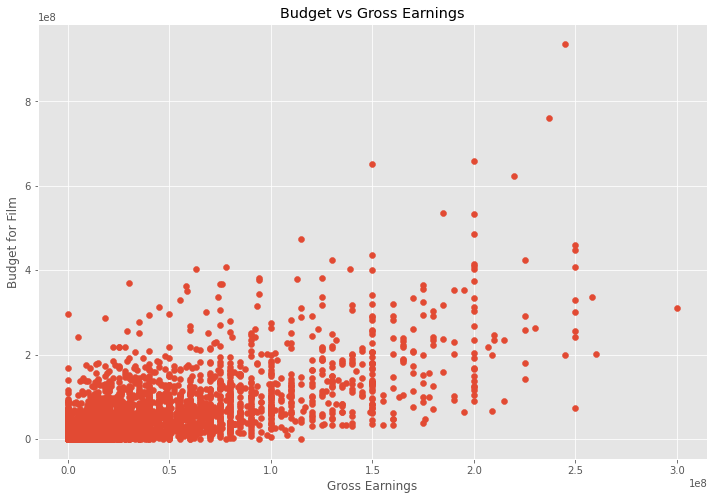

In [39]:
# scatter plot of budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [40]:
df.head()

budget                                 company country  \
6380  245000000                               Lucasfilm     USA   
5061  237000000  Twentieth Century Fox Film Corporation      UK   
2420  200000000  Twentieth Century Fox Film Corporation     USA   
6391  150000000                      Universal Pictures     USA   
5723  220000000                          Marvel Studios     USA   

             director   genre      gross                          name rating  \
6380      J.J. Abrams  Action  936662225  Star Wars: The Force Awakens  PG-13   
5061    James Cameron  Action  760507625                        Avatar  PG-13   
2420    James Cameron   Drama  658672302                       Titanic  PG-13   
6391  Colin Trevorrow  Action  652270625                Jurassic World  PG-13   
5723      Joss Whedon  Action  623357910                  The Avengers  PG-13   

        released  runtime  score               star    votes           writer  \
6380  2015-12-18      136    8.1       Daisy Ridley   687192  Lawrence Kasdan   
5061  2009-12-18      162    7.8    Sam Worthington   954412    James Cameron   
2420  1997-12-19      194    7.8  Leonardo DiCaprio   862554    James Cameron   
6391  2015-06-12      124    7.0        Chris Pratt   469200       Rick Jaffa   
5723  2012-05-04      143    8.1  Robert Downey Jr.  1064633      Joss Whedon   

      year  
6380  2015  
5061  2009  
2420  1997  
6391  2015  
5723  2012

<AxesSubplot:xlabel='budget', ylabel='gross'>

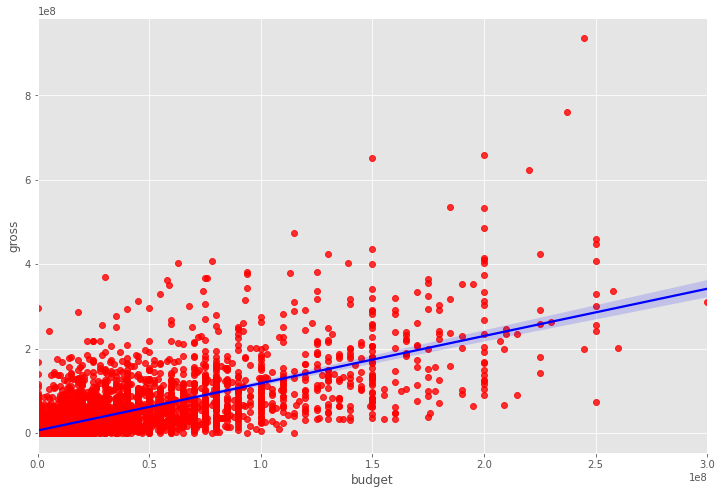

In [41]:
# plot budget vs gross with seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [42]:
# see a positive correlation, calculate how much?
# different methods = pearson, kendall, spearman

df.corr(method='pearson')

budget     gross   runtime     score     votes      year
budget   1.000000  0.712196  0.268226  0.042145  0.503924  0.291009
gross    0.712196  1.000000  0.224579  0.165693  0.662457  0.191548
runtime  0.268226  0.224579  1.000000  0.395343  0.317399  0.087639
score    0.042145  0.165693  0.395343  1.000000  0.393607  0.105276
votes    0.503924  0.662457  0.317399  0.393607  1.000000  0.229304
year     0.291009  0.191548  0.087639  0.105276  0.229304  1.000000

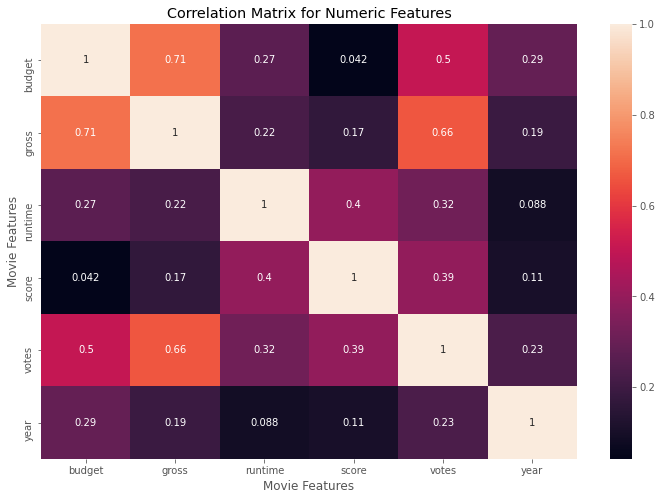

In [43]:
# high correlation between budget and gross 
# visualize correlation matrix

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [60]:
# find correlation with non-numeric features - start with Company
# assign an ID key to each str feature

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

budget  company  country  director  genre        gross  name  \
6380  245000000.0     1428       54      1037      0  936662225.0  4679   
5061  237000000.0     2062       53      1066      0  760507625.0   501   
2420  200000000.0     2062       54      1066      6  658672302.0  6177   
6391  150000000.0     2085       54       466      0  652270625.0  2721   
5723  220000000.0     1491       54      1412      0  623357910.0  4995   

      rating  released  runtime  score  star    votes  writer  year  \
6380       7      2290      136    8.1   475   687192    2356  2015   
5061       7      1800      162    7.8  2084   954412    1629  2009   
2420       7       910      194    7.8  1444   862554    1629  1997   
6391       7      2247      124    7.0   404   469200    3310  2015   
5723       7      1987      143    8.1  2001  1064633    2145  2012   

      yearcorrect  
6380           29  
5061           23  
2420           11  
6391           29  
5723           26

In [51]:
df

budget                                            company  \
6380  245000000.0                                          Lucasfilm   
5061  237000000.0             Twentieth Century Fox Film Corporation   
2420  200000000.0             Twentieth Century Fox Film Corporation   
6391  150000000.0                                 Universal Pictures   
5723  220000000.0                                     Marvel Studios   
4840  185000000.0                                       Warner Bros.   
6614  200000000.0                                          Lucasfilm   
6687  200000000.0                            Pixar Animation Studios   
2870  115000000.0                                          Lucasfilm   
6398  250000000.0                                     Marvel Studios   
5720  250000000.0                                       Warner Bros.   
4001  150000000.0                                         DreamWorks   
5954  130000000.0                                        Color Force   
4404  225000000.0                               Walt Disney Pictures   
5309  200000000.0                               Walt Disney Pictures   
5959  200000000.0                                     Marvel Studios   
6624  250000000.0                                     Marvel Studios   
5722   78000000.0                                          Lionsgate   
3522  139000000.0                      Columbia Pictures Corporation   
1544   63000000.0                                 Universal Pictures   
5082  200000000.0                                         DreamWorks   
5943  150000000.0                      Walt Disney Animation Studios   
5500  125000000.0                                       Warner Bros.   
3750   94000000.0                            Pixar Animation Studios   
4195  113000000.0                                          Lucasfilm   
3743   94000000.0                                    New Line Cinema   
3997  200000000.0                      Columbia Pictures Corporation   
3987   30000000.0                                   Icon Productions   
6658   75000000.0                                 Universal Pictures   
5987   76000000.0                                 Universal Pictures   
6676  175000000.0                             Fairview Entertainment   
6616   58000000.0             Twentieth Century Fox Film Corporation   
6402  175000000.0                            Pixar Animation Studios   
6408  190000000.0                                 Universal Pictures   
5521  195000000.0                                 Paramount Pictures   
6184   58800000.0                                       Warner Bros.   
3530   94000000.0                                    New Line Cinema   
6630  150000000.0                               Walt Disney Pictures   
6197  125000000.0                                        Color Force   
4637  258000000.0                                  Columbia Pictures   
6442   74000000.0                         Illumination Entertainment   
5301  200000000.0                               Walt Disney Pictures   
6162  170000000.0                                     Marvel Studios   
6619  250000000.0                                       Warner Bros.   
1762   55000000.0                                 Paramount Pictures   
6603  175000000.0                                Atlas Entertainment   
4670  160000000.0                               DreamWorks Animation   
4620  150000000.0                                         DreamWorks   
4847  140000000.0                                 Paramount Pictures   
3300  125000000.0                                       Warner Bros.   
4870  185000000.0                                 Paramount Pictures   
3301   93000000.0                                    New Line Cinema   
1764   45000000.0                               Walt Disney Pictures   
5297  200000000.0                                 Paramount Pictures   
3541  115000000.0                                  

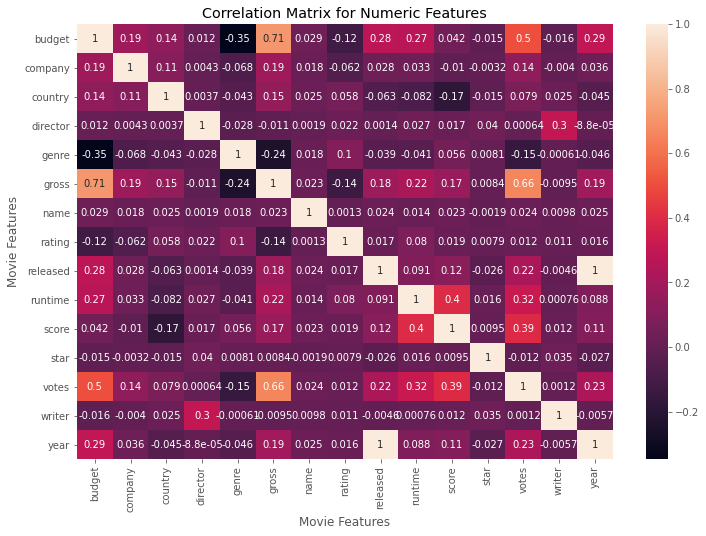

In [52]:
# run same correlation with new data frame

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [53]:
df_numerized.corr()

budget   company   country  director     genre     gross  \
budget    1.000000  0.187205  0.137635  0.011602 -0.346794  0.712196   
company   0.187205  1.000000  0.107950  0.004320 -0.068330  0.187220   
country   0.137635  0.107950  1.000000  0.003698 -0.042793  0.149988   
director  0.011602  0.004320  0.003698  1.000000 -0.027668 -0.011429   
genre    -0.346794 -0.068330 -0.042793 -0.027668  1.000000 -0.242676   
gross     0.712196  0.187220  0.149988 -0.011429 -0.242676  1.000000   
name      0.028712  0.018098  0.025020  0.001905  0.018062  0.022768   
rating   -0.119660 -0.062250  0.057979  0.021926  0.100960 -0.135538   
released  0.276635  0.027898 -0.062609  0.001440 -0.039179  0.178564   
runtime   0.268226  0.033058 -0.081796  0.026779 -0.041357  0.224579   
score     0.042145 -0.010426 -0.174414  0.017130  0.056234  0.165693   
star     -0.015061 -0.003160 -0.014566  0.039813  0.008140  0.008382   
votes     0.503924  0.138662  0.078657  0.000639 -0.150519  0.662457   
writer   -0.015611 -0.004032  0.024981  0.298997 -0.000608 -0.009455   
year      0.291009  0.036272 -0.045204 -0.000088 -0.046259  0.191548   

              name    rating  released   runtime     score      star  \
budget    0.028712 -0.119660  0.276635  0.268226  0.042145 -0.015061   
company   0.018098 -0.062250  0.027898  0.033058 -0.010426 -0.003160   
country   0.025020  0.057979 -0.062609 -0.081796 -0.174414 -0.014566   
director  0.001905  0.021926  0.001440  0.026779  0.017130  0.039813   
genre     0.018062  0.100960 -0.039179 -0.041357  0.056234  0.008140   
gross     0.022768 -0.135538  0.178564  0.224579  0.165693  0.008382   
name      1.000000  0.001288  0.024120  0.013942  0.023342 -0.001910   
rating    0.001288  1.000000  0.016696  0.079542  0.019271  0.007893   
released  0.024120  0.016696  1.000000  0.091102  0.119577 -0.025504   
runtime   0.013942  0.079542  0.091102  1.000000  0.395343  0.016019   
score     0.023342  0.019271  0.119577  0.395343  1.000000  0.009482   
star     -0.001910  0.007893 -0.025504  0.016019  0.009482  1.000000   
votes     0.023665  0.011678  0.221736  0.317399  0.393607 -0.011919   
writer    0.009821  0.010740 -0.004635  0.000759  0.012223  0.035378   
year      0.024624  0.016221  0.996187  0.087639  0.105276 -0.026680   

             votes    writer      year  
budget    0.503924 -0.015611  0.291009  
company   0.138662 -0.004032  0.036272  
country   0.078657  0.024981 -0.045204  
director  0.000639  0.298997 -0.000088  
genre    -0.150519 -0.000608 -0.046259  
gross     0.662457 -0.009455  0.191548  
name      0.023665  0.009821  0.024624  
rating    0.011678  0.010740  0.016221  
released  0.221736 -0.004635  0.996187  
runtime   0.317399  0.000759  0.087639  
score     0.393607  0.012223  0.105276  
star     -0.011919  0.035378 -0.026680  
votes     1.000000  0.001154  0.229304  
writer    0.001154  1.000000 -0.005665  
year      0.229304 -0.005665  1.000000

In [54]:
# organize to see the highest correlations, quickly: unstacking

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget    budget      1.000000
          company     0.187205
          country     0.137635
          director    0.011602
          genre      -0.346794
          gross       0.712196
          name        0.028712
          rating     -0.119660
          released    0.276635
          runtime     0.268226
          score       0.042145
          star       -0.015061
          votes       0.503924
          writer     -0.015611
          year        0.291009
company   budget      0.187205
          company     1.000000
          country     0.107950
          director    0.004320
          genre      -0.068330
          gross       0.187220
          name        0.018098
          rating     -0.062250
          released    0.027898
          runtime     0.033058
          score      -0.010426
          star       -0.003160
          votes       0.138662
          writer     -0.004032
          year        0.036272
country   budget      0.137635
          company     0.107950
        

In [55]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.346794
genre     budget     -0.346794
          gross      -0.242676
gross     genre      -0.242676
country   score      -0.174414
score     country    -0.174414
votes     genre      -0.150519
genre     votes      -0.150519
rating    gross      -0.135538
gross     rating     -0.135538
rating    budget     -0.119660
budget    rating     -0.119660
runtime   country    -0.081796
country   runtime    -0.081796
genre     company    -0.068330
company   genre      -0.068330
country   released   -0.062609
released  country    -0.062609
company   rating     -0.062250
rating    company    -0.062250
genre     year       -0.046259
year      genre      -0.046259
country   year       -0.045204
year      country    -0.045204
country   genre      -0.042793
genre     country    -0.042793
runtime   genre      -0.041357
genre     runtime    -0.041357
          released   -0.039179
released  genre      -0.039179
director  genre      -0.027668
genre     director   -0.027668
year    

In [56]:
# sorting HIGH correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     budget      0.503924
budget    votes       0.503924
votes     gross       0.662457
gross     votes       0.662457
budget    gross       0.712196
gross     budget      0.712196
released  year        0.996187
year      released    0.996187
budget    budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64

In [ ]:
# therefore: VOTES and BUDGET have the HIGHEST correlation to gross earnings 
# also: COMPANY has LOW correlation

